# Pushkal Ojha
# 220968422
# Batch : A2

## Importing Major Libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from sklearn.decomposition import PCA

## Importing CIFER - 10 Dataset

In [6]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 182s 1us/step


In [8]:
print('training data shape:', X_train.shape)
print('testing data shape:', X_test.shape)

training data shape: (50000, 32, 32, 3)
testing data shape: (10000, 32, 32, 3)


In [14]:
len(np.unique(y_train))

10

In [15]:
label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}


Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')


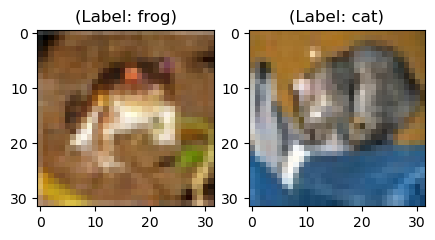

In [19]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(X_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_train[0][0]]) + ")"))

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(X_test[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_test[0][0]]) + ")"))


In [22]:
np.min(X_train),np.max(X_train)


(0, 255)

In [23]:
X_train = X_train/255.0


In [24]:
np.min(X_train),np.max(X_train)

(0.0, 1.0)

In [25]:
X_train.shape

(50000, 32, 32, 3)

In [27]:
X_train_flat = X_train.reshape(-1,3072)

In [28]:
feat_cols = ['pixel'+str(i) for i in range(X_train_flat.shape[1])]

In [29]:
df_cifar = pd.DataFrame(X_train_flat,columns=feat_cols)

In [30]:
df_cifar['label'] = y_train
print('Size of the dataframe: {}'.format(df_cifar.shape))


Size of the dataframe: (50000, 3073)


In [33]:
pca_cifar = PCA(n_components=2)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])

In [34]:
principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2'])
principal_cifar_Df['y'] = y_train


In [35]:
print('Explained variation per principal component: {}'.format(pca_cifar.explained_variance_ratio_))


Explained variation per principal component: [0.2907663  0.11253144]


<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

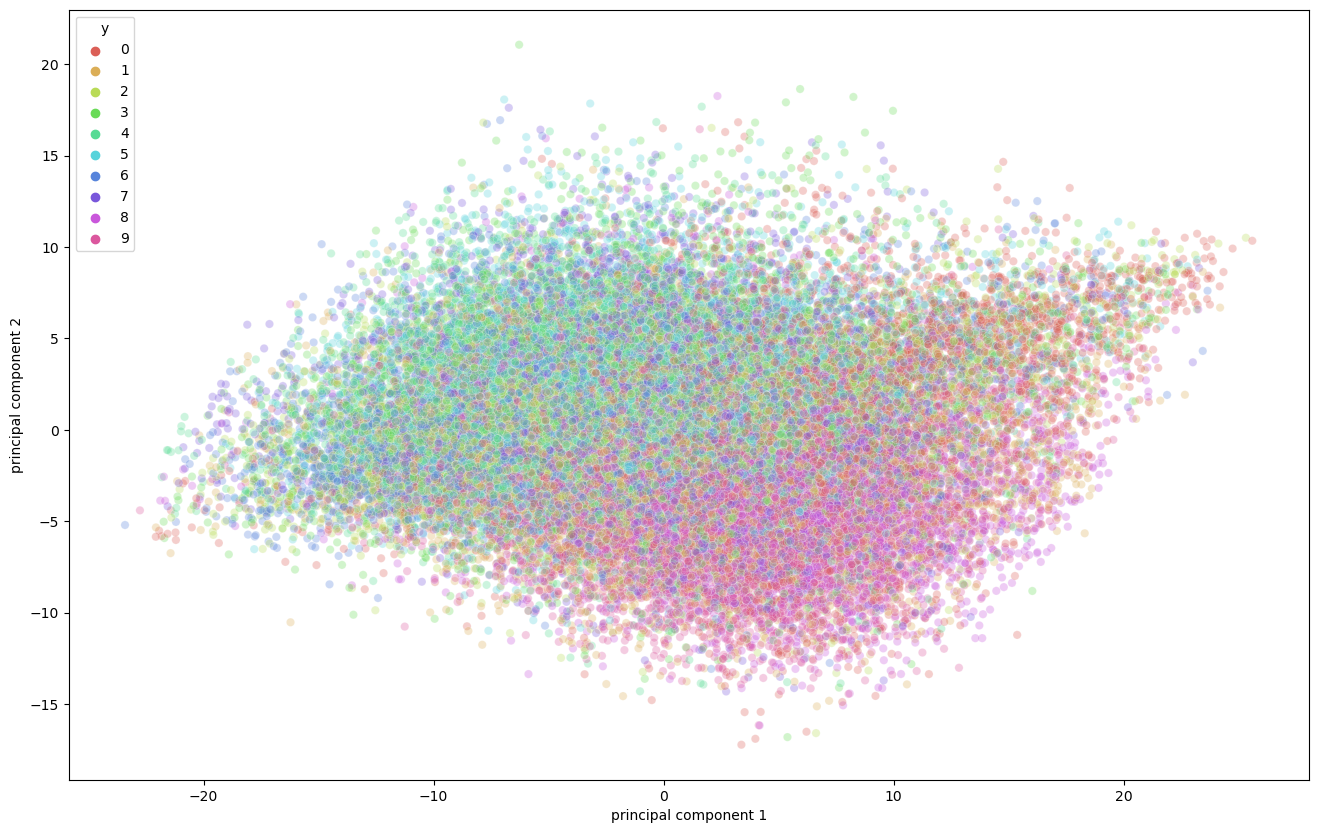

In [36]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)
